navigate to strava folder in terminal and use:
$ APP_SETTINGS=settings.cfg python server.py

open up http://localhost:5000 and grab the access_token from there

In [916]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import timeit
import datetime
import seaborn as sns
from stravalib.client import Client
import os
from pathlib import Path
pd.set_option('display.max_columns', 500)

In [917]:
TOKEN = '30841e5a2d07e469edbfe18ac3f87a9a38a9e10d'

client = Client(access_token=TOKEN)

In [372]:
def meters_to_miles(df, col):
    df[col] = df[col].apply(lambda x : x * 0.000621371)
    
def meters_to_feet(df, col):
    df[col] = df[col].apply(lambda x : x * 3.28084)
    
def remove_meters_label(df, col):
    df[col] = df[col].str[:-2]
    df[col] = df[col].astype(float)
    
def convert_ride_time(df, col):
    df[col] = df[col].str[-8:]
    df[df[col] == '00000000'] = np.nan
    df[col] = pd.to_datetime(df[col], format='%H:%M:%S')
    df[col] = [datetime.datetime.time(d) for d in df[col]]

In [609]:
athlete = client.get_athlete()

In [871]:
os.getcwd()

'/Users/peabody/Documents/galvanize/capstones/strava'

In [891]:
cd ..

/Users/peabody/Documents/galvanize/capstones/strava


In [889]:
def check_strava_dir():
    if os.path.basename(os.getcwd()) != 'strava':
        print('please navigate to strava directory before proceeding.')
        pass
    else:
        print('in strava directory.')

In [894]:
df = ride_ids

In [900]:
df.name

'df'

In [901]:
check_strava_dir()

in strava directory.


In [903]:
def check_dependency(df):
    try:
        df = df
    except:
        print('no'+df+'. run appropriate method')
        pass

In [908]:
check_dependency(dskfj)

NameError: name 'dskfj' is not defined

In [874]:
os.chdir('data/'+'Karyn_Peabody')

FileNotFoundError: [Errno 2] No such file or directory: 'data/Karyn_Peabody'

In [875]:
os.chdir(Path(os.getcwd()).parents[1])

In [876]:
try:
    os.chdir('data/'+self._athlete_name())
    print('data for {0} to be stored in {1}'.format(
        self._athlete_name(),'data/'+self._athlete_name()))
    os.chdir(Path(os.getcwd()).parents[1])
except:
    print('need to create directory first. use .add_athlete()')
    pass

data for Karyn_Peabody to be stored in data/Karyn_Peabody


In [632]:
try: #try to load df
    ath_df = pd.read_csv('data/athletes.csv') 
    print('ath_df successfully loaded')
except: #check that df isn't in memory
    try:
        ath_df = ath_df 
        print('ath_df already in memory')
    except: #create empty df
        ath_cols = ['firstname','lastname','city','state']
        ath_df = pd.DataFrame(columns = ath_cols)
        print('empty ath_df intialized')

ath_df successfully loaded


In [918]:
ath_df

,firstname,lastname,city,state
0,Feldy,Bikes,Golden,CO
1,Karyn,Peabody,Golden,CO


In [ ]:
ath_cols = ['firstname','lastname']

ath_df = pd.DataFrame(columns = ath_cols)

In [828]:
athlete_dict =  client.get_athlete().to_dict()
ath_df = ath_df.append({k:athlete_dict[k] for k in ath_cols if k in athlete_dict},ignore_index=True)
ath_df = ath_df.drop_duplicates()
print('{0} {1} added to ath_df'.format(ath_df.firstname.iloc[-1],ath_df.lastname.iloc[-1]))

ath_df

Karyn Peabody added to ath_df


,firstname,lastname,city,state
0,Feldy,Bikes,Golden,CO
1,Karyn,Peabody,Golden,CO


In [631]:
ath_df.firstname.iloc[-1]

'Karyn'

In [919]:
ath_df.to_csv('data/athletes.csv', index=False)

In [816]:
athlete.firstname

'Karyn'

In [826]:
athlete.firstname in ath_df.firstname

0    Feldy
1    Karyn
Name: firstname, dtype: object

In [634]:
dir = str(ath_df.firstname.iloc[-1] + '_' + ath_df.lastname.iloc[-1]).lower()
dir

'karyn_peabody'

In [877]:
# if os.path.basename(os.getcwd()) == dir:
#     print('in {} directory'.format(dir))
#     pass
# else:
#     try:
#         os.mkdir('data/' + dir)
#         print('{} directory created'.format(dir))
#         print('changing directory to {}'.format(dir))
#     except FileExistsError:
#         os.chdir('data/' + dir)
#         print('{} directory already exists'.format(dir))
#         print('changing directory to {}'.format('data/' + dir))
#     except:
#         print('unable to change directory')
    


In [645]:
try:
    ride_ids = pd.read_csv('data/ride_ids.csv')
    print('ride_ids csv successfully loaded')
except:
    print('need to gather ride IDs...')
    activities = client.get_activities() 
    act_list = list(activities)
    print('ride IDs successfully downloaded')
    ride_id_list = []
    for act in act_list:
        if act.type != 'Ride':
            continue
        else:
            ride_id_list.append(act.id)
    ride_ids = pd.DataFrame(ride_id_list)
    ride_ids.columns = ['ride_id']
    ride_ids.to_csv('ride_ids.csv', index=False)
    print('ride IDs saved to {}/ride_ids.csv'.format(os.path.basename(os.getcwd())))

need to gather ride IDs...
ride IDs successfully downloaded
ride IDs saved to karyn_peabody/ride_ids.csv


In [646]:
print(ride_ids.shape)
ride_ids.head()

(520, 1)


,ride_id
0,2786841798
1,2783913174
2,2783759752
3,2768876238
4,2750664039


In [648]:
len(ride_ids.ride_id.unique())

520

In [732]:
segment_cols = ['ride_name',
                'ride_id',
                'bike',
                'ride_distance',
                'ride_moving_time',
                'ride_elapsed_time',
                'ride_elevation_gain',
                'ride_start_time',
                'segment_id']

segments_df = pd.DataFrame(columns = segment_cols)

In [748]:
segments_df.head()

,ride_name,ride_id,bike,ride_distance,ride_moving_time,ride_elapsed_time,ride_elevation_gain,ride_start_time,segment_id
0,Mountain Top Ride,59116770,NaN,9932.90 m,00:54:03,01:03:52,264.40 m,2013-06-08 17:22:55,1370940
1,Mountain Top Ride,59116770,NaN,9932.90 m,00:54:03,01:03:52,264.40 m,2013-06-08 17:22:55,15316909
2,Mountain Top Ride,59116770,NaN,9932.90 m,00:54:03,01:03:52,264.40 m,2013-06-08 17:22:55,2127168
3,Mountain Top Ride,59116770,NaN,9932.90 m,00:54:03,01:03:52,264.40 m,2013-06-08 17:22:55,1169578
4,Mountain Top Ride,59116770,NaN,9932.90 m,00:54:03,01:03:52,264.40 m,2013-06-08 17:22:55,4291122


In [734]:
ride_index = 0

In [735]:
total_rides = len(list(ride_ids.ride_id))
rides = list(ride_ids.ride_id) #should think about making this a set

In [736]:
try:
    segments_df = pd.read_csv('segments_df.csv')
    print('segments_df successfully loaded')
except:
    print('file not found :(')
downloaded_rides = segments_df.ride_id.unique()

file not found :(


In [737]:
remaining_rides = np.setdiff1d(ride_ids.ride_id,downloaded_rides)
len(remaining_rides)

520

In [738]:
rides_left = len(remaining_rides)
rides = remaining_rides

In [739]:
print('ride_index: {}'.format(ride_index))
print('rides_left: {}'.format(rides_left))

ride_index: 0
rides_left: 520


In [740]:
os.getcwd()

'/Users/peabody/Documents/galvanize/capstones/strava/data/karyn_peabody'

In [759]:
try:
    segments_df = pd.read_csv('segments_df.csv')
    print('segments_df successfully loaded')
except:
    while ride_index <= rides_left:
        try:
            for ride in range(ride_index, rides_left):
                activity = client.get_activity(rides[ride], include_all_efforts=True)
                for segment in activity.segment_efforts:
                    try:
                        activity.gear.name
                        segments_df = segments_df.append({'ride_name' : activity.name,
                                                          'ride_id' : activity.id,
                                                          'bike' : activity.gear.name, 
                                                          'ride_distance' : activity.distance, 
                                                          'ride_moving_time' : activity.moving_time, 
                                                          'ride_elapsed_time' : activity.elapsed_time, 
                                                          'ride_elevation_gain' : activity.total_elevation_gain, 
                                                          'ride_start_time' : activity.start_date_local,
                                                          'segment_id' : segment.segment.id},
                                                         ignore_index=True)
                    except AttributeError: #if activity.gear.name is missing, skip it
                        segments_df = segments_df.append({'ride_name' : activity.name,
                                                          'ride_id' : activity.id,
                                                          'ride_distance' : activity.distance, 
                                                          'ride_moving_time' : activity.moving_time, 
                                                          'ride_elapsed_time' : activity.elapsed_time, 
                                                          'ride_elevation_gain' : activity.total_elevation_gain, 
                                                          'ride_start_time' : activity.start_date_local,
                                                          'segment_id' : segment.segment.id},
                                                         ignore_index=True)
                ride_index += 1
                if ride_index % 50 == 0:
                    print('Last ride downloaded: id:{} {}'.format(segments_df.tail(1).iloc[0,1],
                                                                   segments_df.tail(1).iloc[0,0]))
                    print('It is {0}. Segments for {1} rides downloaded. {2} rides to go'
                          .format(datetime.datetime.now().strftime("%H:%M"),
                                  ride_index, 
                                  rides_left-ride_index))
        except:
            wait = 0
            print('rate limit exceeded, need to wait 15')
            print('it is now {} minutes after the hour'.format(datetime.datetime.now().minute))
            time.sleep(60*16)
            print('trying again...')
    print('segments for all {} rides downloaded'.format(ride_index))

segments_df successfully loaded


In [760]:
segments_df.shape

(13666, 9)

In [755]:
segments_df.to_csv('segments_df.csv', index=False)

In [744]:
print('ride index: {}'.format(ride_index))
print('unique rides downloaded: {}'.format(len(segments_df.ride_id.unique())))
print('unique segments downloaded: {}'.format(len(segments_df.segment_id.unique())))


ride index: 520
unique rides downloaded: 511
unique segments downloaded: 3909


In [920]:
#segments_df = segments_df.drop(['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1','Unnamed: 0.1.1.1'], axis=1)
#segments_df = segments_df.drop(['Unnamed: 0'], axis=1)
segments_df.head()

KeyError: "['Unnamed: 0'] not found in axis"

In [761]:
segments_df.sort_values("ride_id", inplace=True)
segments_df.drop_duplicates(keep='first',inplace=True)
segments_df.shape

(13077, 9)

In [398]:
remove_meters_label(segments_df, 'ride_distance')
meters_to_miles(segments_df, 'ride_distance')
remove_meters_label(segments_df, 'ride_elevation_gain')
meters_to_feet(segments_df, 'ride_elevation_gain')

#convert_ride_time(segments_df,'ride_moving_time')
#convert_ride_time(segments_df,'ride_elapsed_time')

In [749]:
segments_df.head()

,ride_name,ride_id,bike,ride_distance,ride_moving_time,ride_elapsed_time,ride_elevation_gain,ride_start_time,segment_id
0,Mountain Top Ride,59116770,NaN,9932.90 m,00:54:03,01:03:52,264.40 m,2013-06-08 17:22:55,1370940
1,Mountain Top Ride,59116770,NaN,9932.90 m,00:54:03,01:03:52,264.40 m,2013-06-08 17:22:55,15316909
2,Mountain Top Ride,59116770,NaN,9932.90 m,00:54:03,01:03:52,264.40 m,2013-06-08 17:22:55,2127168
3,Mountain Top Ride,59116770,NaN,9932.90 m,00:54:03,01:03:52,264.40 m,2013-06-08 17:22:55,1169578
4,Mountain Top Ride,59116770,NaN,9932.90 m,00:54:03,01:03:52,264.40 m,2013-06-08 17:22:55,4291122


In [762]:
print('shape before drop na:{}'.format(segments_df.shape))
#segments_df = segments_df.dropna()
#print('shape after drop na:{}'.format(segments_df.shape))

shape before drop na:(13077, 9)


In [763]:
print(segments_df.bike.unique())
print(len(segments_df.bike.unique()))

[nan 'Space Unicorn']
2


In [402]:
segments_df = segments_df[~segments_df.bike.isin(['CA Hardtail','Rented/Borrowed/Stolen '])]
print(segments_df.bike.unique())
print(len(segments_df.bike.unique()))

['Road' 'FS Trail' 'DJ' 'Road + Burley' 'Formerly Singlespeed' 'SDF-2'
 'Destro' 'Fixed' 'FatFeld' 'Galvatron' 'Carbon Road' 'Trogdor']
12


In [403]:
segments_df['bike_type'] = segments_df['bike'].apply(lambda x: 'Road' if x in ['Carbon Road',
                                                                               'Road + Burley',
                                                                               'Road',
                                                                               'Fixed'] 
                                                                               else 'Mountain')

In [421]:
segments_by_bike = segments_df.groupby(['bike_type','bike']).count().iloc[:,1].reset_index()
segments_by_bike.rename(columns={"ride_id": "number_of_attempts"}, inplace = True)
segments_by_bike

,bike_type,bike,number_of_attempts
0,Mountain,DJ,369
1,Mountain,Destro,14030
2,Mountain,FS Trail,2120
3,Mountain,FatFeld,590
4,Mountain,Formerly Singlespeed,2554
5,Mountain,Galvatron,3502
6,Mountain,SDF-2,1015
7,Mountain,Trogdor,5470
8,Road,Carbon Road,4318
9,Road,Fixed,164


In [422]:
segments_by_bike_type = segments_df.groupby(['bike_type']).count().iloc[:,1].reset_index()
segments_by_bike_type.rename(columns={"ride_id": "number_of_attempts"}, inplace = True)
segments_by_bike_type

,bike_type,number_of_attempts
0,Mountain,29650
1,Road,28370


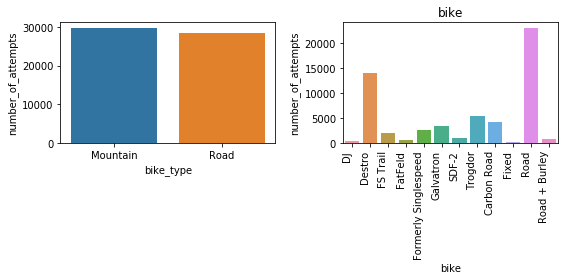

In [427]:
fig, ax = plt.subplots(1,2, figsize = (8,4))
    
sns.barplot(x="bike_type", y = 'number_of_attempts', data=segments_by_bike_type, ax=ax[0])
sns.barplot(x="bike", y = 'number_of_attempts', data=segments_by_bike, ax=ax[1])
ax[1].set_title('bike')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()

In [769]:
# The following was figured out by viewing the output of get_segment_efforts as a dictionary. 
# segment_id and effort_id were added in after-the-fact.
efforts_columns = ['segment_id',
                   'effort_id',
                   'name',
                   'start_date',
                   'moving_time',
                   'elapsed_time',
                   'average_heartrate',
                   'max_heartrate']
efforts_df = pd.DataFrame(columns = efforts_columns)

In [915]:
type(efforts_df.segment_id.unique())

numpy.ndarray

In [770]:
efforts_df.head()

,segment_id,effort_id,name,start_date,moving_time,elapsed_time,average_heartrate,max_heartrate


In [771]:
os.getcwd()

'/Users/peabody/Documents/galvanize/capstones/strava/data/karyn_peabody'

In [789]:
segment_ids = set(segments_df.segment_id)
segment_ids = list(segment_ids)

try:
    efforts_df = pd.read_csv('efforts_df.csv')
    print('efforts df successfully_loaded')
    effort_segs = efforts_df.segment_id.unique()
    remaining_effort_segs = list(np.setdiff1d(segments_df.segment_id,effort_segs))
    print('segments with efforts: {}'.format(len(effort_segs)))
    print('segments with no efforts: {}'.format(len(remaining_effort_segs)))
except FileNotFoundError:
    print('file not found')
    remaining_effort_segs = list(segments_df.segment_id.unique())
    print('segments to gather efforts for: {}'.format(len(remaining_effort_segs)))

efforts df successfully_loaded
segments with efforts: 574
segments with no efforts: 3335


In [790]:
segment_ids = set(segments_df.segment_id)
segment_ids = list(segment_ids)
total_segments = len(segment_ids)
total_segments

3909

In [791]:
effort_segs_to_download = len(remaining_effort_segs)
effort_segs_to_download

3335

In [792]:
effort_segment_index = 0

In [793]:
effort_segment_index

0

In [840]:
print('efforts_df before drop duplicates: {}'.format(efforts_df.shape))
print('unique seqments with efforts before drop duplicates: {}'.format(efforts_df.segment_id.unique().shape))
efforts_df.drop_duplicates(keep='first',inplace=True)
print('efforts_df after drop duplicates: {}'.format(efforts_df.shape))
print('unique seqments with efforts after drop duplicates: {}'.format(efforts_df.segment_id.unique().shape))

efforts_df before drop duplicates: (4599, 8)
unique seqments with efforts before drop duplicates: (1249,)
efforts_df after drop duplicates: (4599, 8)
unique seqments with efforts after drop duplicates: (1249,)


In [841]:
effort_segment_index = 0

remaining_effort_segs = list(np.setdiff1d(segments_df.segment_id,effort_segs))
effort_segs_to_download = len(remaining_effort_segs)
print('efforts to dowload: {}',effort_segs_to_download)

effort_segment_index

efforts to dowload: {} 2786


0

In [843]:
for i in range(0,24):
    print('#{}, segment id: {}'.format(i*50+49,remaining_effort_segs[i*50-1]))
    #print('#{}, segment id: {}'.format(i*50+50,remaining_effort_segs[i*50]))
    #print('#{}, segment id: {}'.format(i*50+51,remaining_effort_segs[i*50+1]))
    #print()

#49, segment id: 22049302
#99, segment id: 4101973
#149, segment id: 4277275
#199, segment id: 4404972
#249, segment id: 4653513
#299, segment id: 4824448
#349, segment id: 4965520
#399, segment id: 5229678
#449, segment id: 5421085
#499, segment id: 5670409
#549, segment id: 5918332
#599, segment id: 6306821
#649, segment id: 6891185
#699, segment id: 7097256
#749, segment id: 7336342
#799, segment id: 7520918
#849, segment id: 7755895
#899, segment id: 7962943
#949, segment id: 8156117
#999, segment id: 8327275
#1049, segment id: 8486352
#1099, segment id: 8905869
#1149, segment id: 9337338
#1199, segment id: 9598272


In [842]:
efforts_df.shape

(4599, 8)

In [844]:
try:
    efforts_df = pd.read_csv('efforts_df2.csv')
    print('efforts df successfully loaded')
except FileNotFoundError:
    
    while effort_segment_index < effort_segs_to_download:
        
        effort_segs = efforts_df.segment_id.unique()
        effort_segment_index = 0
        
        remaining_effort_segs = list(np.setdiff1d(segments_df.segment_id,effort_segs))
        effort_segs_to_download = len(remaining_effort_segs)
        print('remaining segments to get efforts for: {}'.format(effort_segs_to_download))
        
        try:
            for segment in remaining_effort_segs:
                this_segment = list(client.get_segment_efforts(segment))
                for this_effort in this_segment:
                    this_effort_dict = this_effort.to_dict()
                    this_effort_dict['segment_id'] = segment
                    this_effort_dict['effort_id'] = this_effort.id
                    efforts_df = efforts_df.append(
                        {k:this_effort_dict[k] for k in efforts_columns if k in this_effort_dict},
                        ignore_index=True)
                effort_segment_index += 1
                if effort_segment_index % 50 == 0:
                    print('Last segment downloaded: {0} {1}'.format(efforts_df.tail(1).iloc[0,0],
                                                                   efforts_df.tail(1).iloc[0,2]))
                    print('It is {0}. Efforts for {1} segments downloaded. {2} segments to go...'
                          .format(datetime.datetime.now().strftime("%H:%M"),
                                  effort_segment_index,
                                  effort_segs_to_download - effort_segment_index))
        except:
            wait = 0
            print('rate limit exceeded, need to wait until the quarter hour')
            print('it is now {} minutes after the hour'.format(datetime.datetime.now().minute))
            time.sleep(60*16)
            print('trying again...')
    print('efforts for all {} segments downloaded'.format(segment_index))

remaining segments to get efforts for: 2660
rate limit exceeded, need to wait until the quarter hour
it is now 11 minutes after the hour
trying again...
remaining segments to get efforts for: 2660
Last segment downloaded: 4542969 CamelBack 2 
It is 00:27. Efforts for 50 segments downloaded. 2610 segments to go...
Last segment downloaded: 4744579 Bull Rider
It is 00:28. Efforts for 100 segments downloaded. 2560 segments to go...
Last segment downloaded: 4890942 Lizards out of the cage 
It is 00:28. Efforts for 150 segments downloaded. 2510 segments to go...
Last segment downloaded: 5124357 Return CCW - East side
It is 00:28. Efforts for 200 segments downloaded. 2460 segments to go...
Last segment downloaded: 5321089 rolands sprint
It is 00:28. Efforts for 250 segments downloaded. 2410 segments to go...
Last segment downloaded: 5550834 Brick climb
It is 00:28. Efforts for 300 segments downloaded. 2360 segments to go...
Last segment downloaded: 5766897 Baldy climb from Gas house to top in

Last segment downloaded: 20074202 Turtle-Alpe-West Fork
It is 01:56. Efforts for 100 segments downloaded. 391 segments to go...
Last segment downloaded: 20074202 Turtle-Alpe-West Fork
It is 01:56. Efforts for 150 segments downloaded. 341 segments to go...
Last segment downloaded: 20074202 Turtle-Alpe-West Fork
It is 01:56. Efforts for 200 segments downloaded. 291 segments to go...
Last segment downloaded: 20074202 Turtle-Alpe-West Fork
It is 01:56. Efforts for 250 segments downloaded. 241 segments to go...
Last segment downloaded: 20681324 Top of Dogpatch to Blue Rock
It is 01:56. Efforts for 300 segments downloaded. 191 segments to go...
Last segment downloaded: 21005943 Climb to Mitten Corner
It is 01:56. Efforts for 350 segments downloaded. 141 segments to go...
Last segment downloaded: 21385115 End of Webs into River Run to West Branch to turn into Hogs Back
It is 01:56. Efforts for 400 segments downloaded. 91 segments to go...
Last segment downloaded: 21714993 EB Kipling switchbac

In [845]:
print('effort segment index: {}'.format(effort_segment_index))
print('unique segments in segments_df downloaded: {}'.format(len(segments_df.segment_id.unique())))
print('unique segments in efforts_df downloaded: {}'.format(len(efforts_df.segment_id.unique())))
print('unique efforts downloaded: {}'.format(len(efforts_df.effort_id.unique())))

effort segment index: 491
unique segments in segments_df downloaded: 3909
unique segments in efforts_df downloaded: 3612
unique efforts downloaded: 12517


In [846]:
print(efforts_df.shape)
efforts_df.head()

(12517, 8)


,segment_id,effort_id,name,start_date,moving_time,elapsed_time,average_heartrate,max_heartrate
0,748,2575438003,Green Mtn. S.Side,2014-02-27T17:23:14+00:00,0:24:38,0:25:23,NaN,NaN
1,748,47123694510,Green Mtn. S.Side,2018-09-29T22:40:46+00:00,0:24:50,0:25:56,NaN,NaN
2,763,15046074611,Kerr Gulch,2016-06-21T16:53:47+00:00,0:32:50,0:32:50,NaN,NaN
3,771,4050916155,Lair of the Bear S to N,2014-08-01T00:43:50+00:00,0:09:23,0:09:23,NaN,NaN
4,771,2000337341,Lair of the Bear S to N,2013-11-11T18:04:26+00:00,0:10:48,0:10:48,NaN,NaN


In [849]:
cd ..

/Users/peabody/Documents/galvanize/capstones/strava


In [850]:
efforts_df.to_csv('data/'+dir+'/efforts_df.csv', index=False)

In [527]:
unique_effort_ids = list(efforts_df.effort_id.unique())
unique_efforts = len(unique_effort_ids)
unique_efforts

67611

In [528]:
efforts_df.shape

(282564, 8)

In [535]:
efforts_df.sort_values("effort_id").head(100)

,segment_id,effort_id,name,start_date,moving_time,elapsed_time,average_heartrate,max_heartrate
210134,649639,660391611,Enchanted forest descent,2012-07-28T14:21:34+00:00,0:08:13,0:08:13,NaN,NaN
167168,649639,660391611,Enchanted forest descent,2012-07-28T14:21:34+00:00,0:08:13,0:08:13,NaN,NaN
214855,664486,660391612,Colorow Rd Climb,2012-07-28T14:04:37+00:00,0:07:37,0:07:37,NaN,NaN
171889,664486,660391612,Colorow Rd Climb,2012-07-28T14:04:37+00:00,0:07:37,0:07:37,NaN,NaN
214790,665783,660391613,Lower LMR to Upper LMR,2012-07-28T13:32:18+00:00,0:18:35,0:18:35,NaN,NaN
171824,665783,660391613,Lower LMR to Upper LMR,2012-07-28T13:32:18+00:00,0:18:35,0:18:35,NaN,NaN
214871,665788,660391614,Upper LMR to Colorow Rd,2012-07-28T13:52:30+00:00,0:20:09,0:20:09,NaN,NaN
171905,665788,660391614,Upper LMR to Colorow Rd,2012-07-28T13:52:30+00:00,0:20:09,0:20:09,NaN,NaN
218119,667394,660391615,"Chimney Gulch (pillars to top, skipping bottom...",2012-07-28T13:27:43+00:00,0:44:45,0:44:45,NaN,NaN
215767,667394,660391615,"Chimney Gulch (pillars to top, skipping bottom...",2012-07-28T13:27:43+00:00,0:44:45,0:44:45,NaN,NaN


In [537]:
efforts_df.sort_values("effort_id", inplace=True)
efforts_df.drop_duplicates(inplace=True)
efforts_df.shape

(67611, 8)

In [536]:
efforts_df.effort_id.unique().shape[0]

67611

In [538]:
print('segment_index: {}'.format(segment_index))
print('have efforts for {} segments'.format(efforts_df.segment_id.unique().shape[0]))
print('total efforts: {}'.format(efforts_df.effort_id.unique().shape[0]))

segment_index: 3868
have efforts for 8357 segments
total efforts: 67611


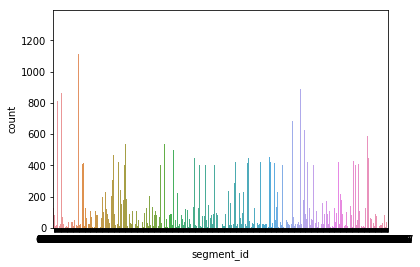

In [374]:
sns.countplot(x="segment_id", data=efforts_df)

In [43]:
np.max(efforts_df.groupby('effort_id').count().sort_values(by = 'name', ascending = False).iloc[:,0])

1

In [44]:
popular_segments = pd.DataFrame(efforts_df.groupby('segment_id').count().sort_values(by = 'name', ascending = False).iloc[:,0])
popular_segments.reset_index(inplace = True)

In [45]:
top10segs = list(popular_segments.head(10).iloc[:,0])
top10segs

[20831165,
 3965883,
 991763,
 979002,
 8590679,
 1042067,
 12046898,
 14716360,
 17747809,
 7431006]

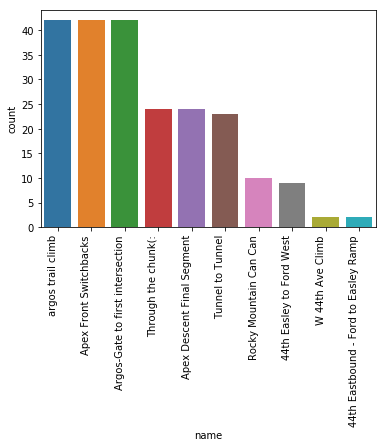

In [921]:
data = efforts_df[efforts_df.segment_id.isin(top10segs)]

plt = sns.countplot(x = 'name',
                    data = data, 
                    order = data.name.value_counts().index)
plt.set_xticklabels(plt.get_xticklabels(), rotation=90, ha="right");

In [540]:
efforts_df.effort_id.unique().shape

(67611,)

In [48]:
seg_details_cols = ['segment_id',
                    'name',
                    'distance',
                    'average_grade',
                    'maximum_grade',
                    'elevation_high',
                    'elevation_low',
                    'total_elevation_gain',
                    'start_latitude',
                    'end_latitude',
                    'start_longitude',
                    'end_longitude',
                    'climb_category',
                    'city',
                    'state',
                    'country',
                    'effort_count',
                    'athlete_count',
                    'athlete_segment_stats',
                    'map']
seg_details_df = pd.DataFrame(columns = seg_details_cols)
seg_details_df

,segment_id,name,distance,average_grade,maximum_grade,elevation_high,elevation_low,total_elevation_gain,start_latitude,end_latitude,start_longitude,end_longitude,climb_category,city,state,country,effort_count,athlete_count,athlete_segment_stats,map


In [542]:
seg_details_df = pd.read_csv('data/seg_details_df.csv')
seg_details_df.shape

(7464, 20)

In [543]:
#seg_details_index = seg_details_df.shape[0]

In [544]:
print('shape before drop duplicates: {}'.format(seg_details_df.shape))
print('unique seqments before drop duplicates: {}'.format(seg_details_df.segment_id.unique().shape))
seg_details_df.drop_duplicates(subset='segment_id', keep='first',inplace=True)
print('shape after drop duplicates: {}'.format(seg_details_df.shape))
print('unique seqments after drop duplicates: {}'.format(seg_details_df.segment_id.unique().shape))

shape before drop duplicates: (7464, 20)
unique seqments before drop duplicates: (7464,)
shape after drop duplicates: (7464, 20)
unique seqments after drop duplicates: (7464,)


In [545]:
segment_ids = set(segment_ids)
len(segment_ids)

7628

In [546]:
downloaded_details = set(seg_details_df.segment_id)

seg_details_set = set(segment_ids)
seg_details_set.difference_update(downloaded_details)
segments_remaining = len(seg_details_set)

segments_remaining

164

In [547]:
len(seg_details_set)

164

In [548]:
seg_details_id_list = list(seg_details_set)
len(seg_details_id_list)

164

In [549]:
seg_details_df.groupby('segment_id').count().sort_values('distance', ascending = False).distance.head(10)

segment_id
746         1
10665888    1
10726626    1
10721320    1
10719674    1
10719640    1
10714228    1
10713223    1
10687774    1
10686364    1
Name: distance, dtype: int64

In [550]:
seg_details_df[seg_details_df.segment_id == 5297441] #why are there two of these? Is it in the polyline?

,segment_id,name,distance,average_grade,maximum_grade,elevation_high,elevation_low,total_elevation_gain,start_latitude,end_latitude,start_longitude,end_longitude,climb_category,city,state,country,effort_count,athlete_count,athlete_segment_stats,map
3183,5297441,NaN,332.5,1.6,6.5,1777.8,1772.4,5.4,39.667368,39.670296,-105.186023,-105.186771,0,Morrison,CO,United States,76078,10718,"{'effort_count': 6, 'pr_elapsed_time': '0:00:4...","{'id': 's5297441', 'polyline': '_pbqFtc_aSiQtC..."


In [551]:
#client.get_segment(seg_details_id_list[49]).to_dict()

In [552]:
seg_details_index = 0

In [553]:
seg_details_index

0

In [554]:
for i in range(0,24):
    print('#{}, segment id: {}'.format(i*50+49,seg_details_id_list[i*50-1]))
    print()


#49, segment id: 6271997

#99, segment id: 7654708

#149, segment id: 793174

#199, segment id: 715704



IndexError: list index out of range

In [555]:
try:
    seg_details_df = pd.read_csv('data/seg_details_df.csv')
    print('seg_details_df successfully loaded')
except FileNotFoundError:
    while seg_details_index < segments_remaining:
        try:
            for segment in seg_details_id_list:
                this_segment_dict = client.get_segment(segment).to_dict()
                this_segment_dict['segment_id'] = segment
                seg_details_df = seg_details_df.append(
                    {k:this_segment_dict[k] for k in seg_details_cols if k in this_segment_dict},
                    ignore_index=True)
                seg_details_index += 1
                if seg_details_index % 50 == 0:
                    print('Last segment downloaded: {0} {1}'.format(seg_details_df.tail(1).iloc[0,0],
                                                                   seg_details_df.tail(1).iloc[0,1]))
                    print('It is {0}. {1} segments downloaded. {2} segments to go...'
                          .format(datetime.datetime.now().strftime("%H:%M"),
                                  seg_details_index,
                                  segments_remaining - seg_details_index))
        except:
            wait = 0
            print('rate limit exceeded, need to wait 15 minutes')
            print('it is now {} minutes after the hour'.format(datetime.datetime.now().minute))
            time.sleep(60*16)
            print('trying again...')
    print('all {} segments downloaded'.format(seg_details_index))

Last segment downloaded: 7654708 Black line
It is 17:04. 50 segments downloaded. 114 segments to go...
Last segment downloaded: 793174 bears run
It is 17:04. 100 segments downloaded. 64 segments to go...
Last segment downloaded: 715704 Unnamed Rd Climb
It is 17:04. 150 segments downloaded. 14 segments to go...
all 164 segments downloaded


In [556]:
print('seg_details_df shape: {}'.format(seg_details_df.shape))
print('seg_details_df unique: {}'.format(seg_details_df.segment_id.unique().shape))

seg_details_df shape: (7628, 20)
seg_details_df unique: (7628,)


In [557]:
seg_details_df.to_csv('data/seg_details_df.csv', index=False)

In [559]:
#seg_details_df = seg_details_df.drop(['Unnamed: 0'], axis=1)
#seg_details_df = seg_details_df.drop(['Unnamed: 0.1'], axis=1)
print(seg_details_df[seg_details_df.athlete_segment_stats.isna()].shape)
#print(seg_details_df[seg_details_df.pr_elapsed_time.isna()].shape)

(0, 20)


In [ ]:
#this is in case seg_details_df gets saved after cleaning

# unpacked = seg_details_df[~seg_details_df.pr_elapsed_time.isna()]
# packed = seg_details_df[seg_details_df.pr_elapsed_time.isna()]
# print(seg_details_df.shape)
# print(unpacked.shape)
# print(packed.shape)
# print(packed.shape[0] + unpacked.shape[0])

# packed = packed.drop('all_athlete_efforts_count', axis = 1)
# packed['all_athlete_efforts_count'] = packed['effort_count'] 
# packed = packed.drop('pr_elapsed_time', axis = 1)
# packed = packed.drop('pr_date', axis = 1)
# #packed = packed.drop('effort_count', axis = 1)
# packed.head()


# packed = unpack_dict_col(packed, 'athlete_segment_stats')
# meters_to_miles(packed,'distance')
# meters_to_feet(packed,'elevation_high')
# meters_to_feet(packed,'elevation_low')
# meters_to_feet(packed,'total_elevation_gain')

In [560]:
seg_details_df.shape

(7628, 20)

In [561]:
seg_details_df.segment_id.unique().shape

(7628,)

In [562]:
seg_details_df = seg_details_df.rename(columns={"effort_count": "all_athlete_efforts_count"})

In [563]:
def unpack_dict_col(df, col):
    return df.drop(col, 1).assign(**df[col].apply(pd.Series))

In [565]:
seg_details_df.head()

,segment_id,name,distance,average_grade,maximum_grade,elevation_high,elevation_low,total_elevation_gain,start_latitude,end_latitude,start_longitude,end_longitude,climb_category,city,state,country,all_athlete_efforts_count,athlete_count,athlete_segment_stats,map
0,12338997,For All The Lil Groms,94.30,-2.3,1.5,1677.4,1674.4,0.0000,39.758621,39.758319,-105.219889,-105.219699,0,Golden,Colorado,United States,22291,5310,"{'effort_count': 104, 'pr_elapsed_time': '0:00...","{'id': 's12338997', 'polyline': 'kjtqFhweaSBC?..."
1,991763,Tunnel to Tunnel,445.34,4.5,29.1,1809.3,1788.7,23.5522,39.735290,39.731473,-105.214684,-105.215807,0,Golden,CO,United States,14963,2849,"{'effort_count': 221, 'pr_elapsed_time': '0:00...","{'id': 's991763', 'polyline': 'qxoqFxvdaSrATLr..."
2,1284311,Golden Cruise: Parking Lot to First Parking Ga...,485.70,-0.5,6.1,1726.4,1722.2,0.0000,39.759567,39.756275,-105.219683,-105.220585,0,Golden,CO,United States,1780,642,"{'effort_count': 129, 'pr_elapsed_time': '0:01...","{'id': 's1284311', 'polyline': 'gptqF`veaSVl@V..."
3,17747809,44th Easley to Ford West,1967.10,0.4,14.8,1730.1,1722.3,12.7000,39.768894,39.759348,-105.201451,-105.220300,0,Golden,Colorado,United States,44812,5039,"{'effort_count': 172, 'pr_elapsed_time': '0:03...","{'id': 's17747809', 'polyline': 'qjvqFbdbaSFd@..."
4,7431006,Rocky Mountain Can Can,1416.10,0.5,5.7,1725.0,1718.6,6.4000,39.769799,39.763684,-105.198423,-105.212839,0,Golden,CO,United States,42360,4829,"{'effort_count': 172, 'pr_elapsed_time': '0:02...","{'id': 's7431006', 'polyline': 'epvqFdqaaS^bBn..."


In [566]:
seg_details_df = unpack_dict_col(seg_details_df, 'athlete_segment_stats')

TypeError: assign() keywords must be strings

In [567]:
meters_to_miles(seg_details_df,'distance')
meters_to_feet(seg_details_df,'elevation_high')
meters_to_feet(seg_details_df,'elevation_low')
meters_to_feet(seg_details_df,'total_elevation_gain')

In [568]:
seg_details_df.head()

,segment_id,name,distance,average_grade,maximum_grade,elevation_high,elevation_low,total_elevation_gain,start_latitude,end_latitude,start_longitude,end_longitude,climb_category,city,state,country,all_athlete_efforts_count,athlete_count,athlete_segment_stats,map
0,12338997,For All The Lil Groms,0.058595,-2.3,1.5,5503.281016,5493.438496,0.000000,39.758621,39.758319,-105.219889,-105.219699,0,Golden,Colorado,United States,22291,5310,"{'effort_count': 104, 'pr_elapsed_time': '0:00...","{'id': 's12338997', 'polyline': 'kjtqFhweaSBC?..."
1,991763,Tunnel to Tunnel,0.276721,4.5,29.1,5936.023812,5868.438508,77.271000,39.735290,39.731473,-105.214684,-105.215807,0,Golden,CO,United States,14963,2849,"{'effort_count': 221, 'pr_elapsed_time': '0:00...","{'id': 's991763', 'polyline': 'qxoqFxvdaSrATLr..."
2,1284311,Golden Cruise: Parking Lot to First Parking Ga...,0.301800,-0.5,6.1,5664.042176,5650.262648,0.000000,39.759567,39.756275,-105.219683,-105.220585,0,Golden,CO,United States,1780,642,"{'effort_count': 129, 'pr_elapsed_time': '0:01...","{'id': 's1284311', 'polyline': 'gptqF`veaSVl@V..."
3,17747809,44th Easley to Ford West,1.222299,0.4,14.8,5676.181284,5650.590732,41.666668,39.768894,39.759348,-105.201451,-105.220300,0,Golden,Colorado,United States,44812,5039,"{'effort_count': 172, 'pr_elapsed_time': '0:03...","{'id': 's17747809', 'polyline': 'qjvqFbdbaSFd@..."
4,7431006,Rocky Mountain Can Can,0.879923,0.5,5.7,5659.449000,5638.451624,20.997376,39.769799,39.763684,-105.198423,-105.212839,0,Golden,CO,United States,42360,4829,"{'effort_count': 172, 'pr_elapsed_time': '0:02...","{'id': 's7431006', 'polyline': 'epvqFdqaaS^bBn..."


In [569]:
fig, ax = plt.subplots()

ax.hist(seg_details_df.climb_category)
ax.set_title('Climb Category Histogram')
ax.set_ylabel('Segment Count')
ax.set_xlabel('Climb Category')
ax.set_xticks(np.linspace(0,5,6))
ax.set_xlim(-.5,5.5)
plt.tight_layout();

AttributeError: 'AxesSubplot' object has no attribute 'subplots'

In [101]:
segments_df.head()

,ride_name,ride_id,bike,ride_distance,ride_moving_time,ride_elapsed_time,ride_elevation_gain,ride_start_time,segment_id,bike_type
63257,"07/30/2012 Golden, CO",40082170,Road,18.708238,0 days 01:22:35.000000000,0 days 10:40:32.000000000,970.472472,2012-07-30 07:20:46,12338997,Road
63258,"07/30/2012 Golden, CO",40082170,Road,18.708238,0 days 01:22:35.000000000,0 days 10:40:32.000000000,970.472472,2012-07-30 07:20:46,991763,Road
63256,"07/30/2012 Golden, CO",40082170,Road,18.708238,0 days 01:22:35.000000000,0 days 10:40:32.000000000,970.472472,2012-07-30 07:20:46,1284311,Road
63255,"07/30/2012 Golden, CO",40082170,Road,18.708238,0 days 01:22:35.000000000,0 days 10:40:32.000000000,970.472472,2012-07-30 07:20:46,17747809,Road
63254,"07/30/2012 Golden, CO",40082170,Road,18.708238,0 days 01:22:35.000000000,0 days 10:40:32.000000000,970.472472,2012-07-30 07:20:46,7431006,Road


In [ ]:
leaders_cols = []

In [723]:
leader_index = 0

In [724]:
leader_index

0

In [801]:
lb_dict = client.get_segment_leaderboard(991763).to_dict()

In [809]:
pd.DataFrame(lb_dict['entries'])

,athlete_name,elapsed_time,moving_time,rank,start_date,start_date_local
0,Sammy R.,0:00:44,0:00:44,1,2013-07-19T19:35:22+00:00,2013-07-19T13:35:22
1,Tobias F.,0:00:46,0:00:46,2,2013-07-16T19:59:15+00:00,2013-07-16T13:59:15
2,Keith N.,0:00:52,0:00:52,3,2013-08-15T00:38:53+00:00,2013-08-14T18:38:53
3,Feldy B.,0:00:52,0:00:52,3,2018-06-02T21:22:32+00:00,2018-06-02T15:22:32
4,Kyle C.,0:00:53,0:00:53,5,2013-03-13T23:18:59+00:00,2013-03-13T17:18:59
5,Edwin S.,0:00:55,0:00:55,6,2015-03-17T16:43:49+00:00,2015-03-17T10:43:49
6,Brian G.,0:00:55,0:00:55,6,2019-05-11T23:13:05+00:00,2019-05-11T17:13:05
7,Shawn S.,0:00:57,0:00:57,8,2013-08-04T22:22:22+00:00,2013-08-04T16:22:22
8,Todd A.,0:00:57,0:00:57,8,2019-08-24T14:31:26+00:00,2019-08-24T08:31:26
9,John P.,0:00:58,0:00:58,10,2012-04-24T17:24:53+00:00,2012-04-24T11:24:53


In [ ]:
### This is not complete yet

# try:
#     leaders_df = pd.read_csv('data/leaders_df.csv')
#     print('leader_df successfully loaded')
# except FileNotFoundError:
#     while leader_index < total_segments:
#         try:
#             for segment in segment_ids:
#                 this_leader_dict = client.get_segment_leaderboard(segment).to_dict()
#                 this_leader_dict['segment_id'] = segment
#                 leaders_df = leaders_df.append(
#                     {k:this_leader_dict[k] for k in leaders_cols if k in this_leader_dict},
#                     ignore_index=True)
#                 leader_index += 1
#                 if leader_index % 50 == 0:
#                     print('It is {0}. {1} leaderboards downloaded. {2} leaderboards to go...'
#                           .format(datetime.datetime.now().strftime("%H:%M"),
#                                   leader_index,
#                                   total_segments - leader_index))
#         except:
#             wait = 0
#             print('rate limit exceeded, need to wait 15 minutes')
#             print('it is now {} minutes after the hour'.format(datetime.datetime.now().minute))
#             time.sleep(60)
#             print('trying again...')
#     print('all {} segments downloaded'.format(seg_details_index))

In [926]:
segments_df['percent_road'] = np.where(segments_df['bike_type']=='Road',1,0)
segments_df.astype({'segment_id': 'str', 'ride_id': 'str'})
segments_df

KeyError: 'bike_type'

In [927]:
bike_segment = segments_df.groupby('segment_id').mean().reset_index()
bike_segment.drop(['ride_id'], axis=1,inplace=True)
bike_segment['road_threshold'] = np.where(bike_segment.percent_road > .7, 1, np.where(bike_segment.percent_road < .3, 0, np.nan))
bike_segment.head()

AttributeError: 'DataFrame' object has no attribute 'percent_road'

In [104]:
segments_df.loc[segments_df.segment_id == 763]

,ride_name,ride_id,bike,ride_distance,ride_moving_time,ride_elapsed_time,ride_elevation_gain,ride_start_time,segment_id,bike_type,percent_road
33618,Turns out Kerr Gulch got paved sometime in the...,325955050,Road,37.830123,0 days 02:55:01.000000000,0 days 03:02:34.000000000,3713.91088,2015-06-14 17:02:00,763,Road,1
11629,And I brought my Lambo. So embarrassing.,1615321457,Carbon Road,44.819801,0 days 03:22:34.000000000,0 days 03:23:02.000000000,4734.25212,2018-06-03 08:58:45,763,Road,1


In [923]:
fig, ax = plt.subplots(1,1)

ax.hist(bike_segment.percent_road, bins = 50, label = 'Percentage')
ax.hist(bike_segment.road_threshold.dropna(), bins = 20, alpha = .4, label = 'Threshold >0.7 & <0.3')
ax.set_title('Disttribution of Segments by Bike')
ax.set_ylabel('Segment Count')
ax.set_xlabel('Percentage Road Bike')
ax.legend()

plt.tight_layout();

AttributeError: 'AxesSubplot' object has no attribute 'subplots'

In [924]:
halfandhalf = list(bike_segment[bike_segment.percent_road == .5].segment_id)

NameError: name 'bike_segment' is not defined

In [108]:
seg_details_df.loc[seg_details_df['segment_id'].isin(halfandhalf)].name.unique()

array(['the Prairie Steamer', 'Slee to Jesse Way',
       '93 to White Ranch Lower PL', 'Pine Ridge Rd ascent',
       'Pine Ridge climb from South', 'County Road 56 Climb',
       'Last steep mile of CT5 eastside descent to Kenosha',
       'Redskin Creek Rd Climb'], dtype=object)

In [185]:
#bike_segment = pd.DataFrame([segments_df.bike_type,segments_df.segment_id]).transpose()
#bike_segment.head()

In [930]:
bike_selection_df = pd.merge(seg_details_df, bike_segment, on = 'segment_id')

In [112]:
bike_selection_df.head()

,segment_id,name,distance,average_grade,maximum_grade,elevation_high,elevation_low,total_elevation_gain,start_latitude,end_latitude,start_longitude,end_longitude,climb_category,city,state,country,all_athlete_efforts_count,athlete_count,map,effort_count,pr_elapsed_time,pr_date,ride_distance,ride_elevation_gain,percent_road,road_threshold
0,12338997,For All The Lil Groms,0.058595,-2.3,1.5,5503.281016,5493.438496,0.000,39.758621,39.758319,-105.219889,-105.219699,0,Golden,Colorado,United States,22291,5310,"{'id': 's12338997', 'polyline': 'kjtqFhweaSBC?...",104.0,0:00:08,2014-05-28,18.593782,1254.020892,0.833333,1.0
1,12338997,For All The Lil Groms,0.058595,-2.3,1.5,5503.281016,5493.438496,0.000,39.758621,39.758319,-105.219889,-105.219699,0,Golden,Colorado,United States,22291,5310,"{'id': 's12338997', 'polyline': 'kjtqFhweaSBC?...",104.0,0:00:08,2014-05-28,18.593782,1254.020892,0.833333,1.0
2,12338997,For All The Lil Groms,0.058595,-2.3,1.5,5503.281016,5493.438496,0.000,39.758621,39.758319,-105.219889,-105.219699,0,Golden,Colorado,United States,22291,5310,"{'id': 's12338997', 'polyline': 'kjtqFhweaSBC?...",104.0,0:00:08,2014-05-28,18.593782,1254.020892,0.833333,1.0
3,12338997,For All The Lil Groms,0.058595,-2.3,1.5,5503.281016,5493.438496,0.000,39.758621,39.758319,-105.219889,-105.219699,0,Golden,Colorado,United States,22291,5310,"{'id': 's12338997', 'polyline': 'kjtqFhweaSBC?...",104.0,0:00:08,2014-05-28,18.593782,1254.020892,0.833333,1.0
4,991763,Tunnel to Tunnel,0.276721,4.5,29.1,5936.023812,5868.438508,77.271,39.735290,39.731473,-105.214684,-105.215807,0,Golden,CO,United States,14963,2849,"{'id': 's991763', 'polyline': 'qxoqFxvdaSrATLr...",221.0,0:00:52,2018-06-02,17.415018,1310.042693,0.785000,1.0


In [931]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression

In [932]:
def get_sec(time_str):
    """Get Seconds from time."""
    h, m, s = time_str.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

In [933]:
modeling_df = bike_selection_df.dropna()

X = modeling_df[['distance','average_grade','elevation_low','pr_elapsed_time']]
X.loc[:,'pr_elapsed_time'] = X.loc[:,'pr_elapsed_time'].apply(get_sec)
X.head()

KeyError: "['pr_elapsed_time'] not in index"

In [938]:
y = modeling_df.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

AttributeError: 'DataFrame' object has no attribute 'bike_type'

In [935]:
thresholds = np.linspace(0,1,21)

In [936]:
# def model_thresholds(mod, xtrain, ytrain, xtest, ytest):
#     acc_list = []
#     model = mod
#     model.fit(xtrain,ytrain)
#     for th in thresholds:
        

In [937]:
logistic_acc_list = []
model = LogisticRegression()
model.fit(X_train, y_train)
y_hat_probs = model.predict_proba(X_test)[:,1]
for th in thresholds:
    yhat = np.where(y_hat_probs > th, 1, 0)
    logistic_acc_list.append(np.mean(np.where(yhat == y_test,1,0)))

NameError: name 'X_train' is not defined

In [119]:
linear_acc_list = []
model = LinearRegression()
model.fit(X_train, y_train)
y_hat_probs = model.predict(X_test)
for th in thresholds:
    yhat = np.where(y_hat_probs > th, 1, 0)
    linear_acc_list.append(np.mean(np.where(yhat == y_test,1,0)))

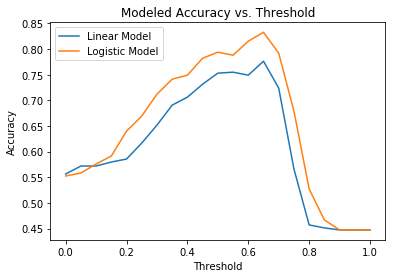

In [120]:
fig, ax = plt.subplots()

ax.plot(thresholds,linear_acc_list, label = 'Linear Model')
ax.plot(thresholds,logistic_acc_list, label = 'Logistic Model')
ax.legend()
ax.set_xlabel('Threshold')
ax.set_ylabel('Accuracy')
ax.set_title('Modeled Accuracy vs. Threshold');

In [121]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_hat_probs = model.predict_proba(X_test)[:,1]
yhat = np.where(y_hat_probs > .5, 1, 0)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [429]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes, ax,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    #fig, ax = plt.subplots() 
    fig = plt.subplots()[0] 
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    #fig.tight_layout()
    return ax

NameError: name 'y_test' is not defined

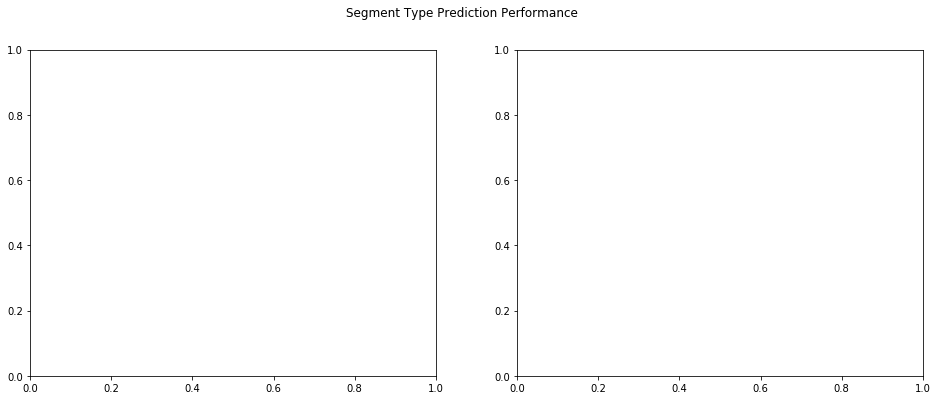

In [430]:
class_names = ['Road','Mountain']
fig, ax = plt.subplots(1,2, figsize = (16,6))

fig.suptitle('Segment Type Prediction Performance')

plot_confusion_matrix(y_test, yhat, class_names, ax[0],
                              normalize=False,
                              title=None,
                              cmap=plt.cm.Blues)
plot_confusion_matrix(y_test, yhat, class_names, ax[1],
                              normalize=True,
                              title=None,
                              cmap=plt.cm.Blues)
    
    
fig.tight_layout()
#ax[0].plot()
;

In [358]:
from sklearn import svm, datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

In [362]:
class_names[:2]

array(['setosa', 'versicolor'], dtype='<U10')